# Homework 8b: Ising Model
Physics 177, Spring 2018  
**Due:** Tuesday, May 29

*Jeremy Quijano*

## Discussion

This is the keystone project of our course. The Ising model for a magnet is characterized by the energy function:

$$E = - J\sum_{i,j}^\text{n.n.}s_i s_j$$

where 'n.n.' means "nearest neighbors" (the four adjacent cells in 2D).  Here $s_{i} = \pm 1$ is the **spin in the $z$-direction** of the electron at site `i`. We've chosen a convenient normalization. In fact, we'll choose convenient units where $J = \mu = k_B = 1$. 

## Problem 1: Ising Model

Simulate the 2D Ising model using Markov Chain Monte Carlo and the following parameters:

* `nSide = 20`, the number of nodes per side
* `nTemp = 100`, the number of temperature samples
* `Tmin = 1`, `Tmax = 4`, the mininum and maximum temperatures to scan
* `nStep = 10000`, the number of Monte Carlo steps to sample the microstates

**You should structure your program as follows:**  
* Define a variable `state` that is a `nSide` by `nSide` numpy array. Here's a good way to initialize it:

```python
state = 2*np.random.randint(2, size=(nSide,nSide))-1
```

* Define a function `mcmc(state, ii, jj, T)` that takes in a state, two indices (between `0` and `nSide-1`), and a temperature and outputs the state after one Markov Chain step.  
  
  
* The Markov Chain step should be as follows: look at the spin at position (`ii`, `jj`). Propose a step: flip the spin: `spin *= -1`. If that step is energetically favorable, do it. If not, roll the dice relative to $P = e^{-\Delta E/T}$. Note that `deltaE = 2*spin*Heff`, where the effective magnetic field is simply the sum of nearest neighbor spins.  
  
  
* What about boundary states? To simplify our lives, impose periodic boundary conditions. Thus the "neighbor to the right" of `state[ii,jj]` is `state[(ii+1)%nSide, jj]`.  
  
  
* Define a function `magnetization(state)` that takes in a state and outputs the sum of spins over all sites. The `np.sum` function may be useful.  
  
  
* Define a function `plotState(state)` that plots the spins. Here's a nice definition that you can use:
```python
def plotState(state):
    N = np.shape(state)[0]
    xs, ys = np.meshgrid(range(N), range(N))
    plt.axis('square')
    plt.axis((0,N-1,0,N-1))
    plt.pcolormesh(xs, ys, state, cmap=plt.get_cmap('binary'))
    plt.xticks([])
    plt.yticks([])
    plt.show
```
  
  
* To run the program: equilibrate the system at `Tmin`. This means running the Markov Chain step over and over again (*without* taking data) to make sure that the system settles to a low energy state. In other words, when you start sampling, you want to sample a "typical" microstate at `Tmin`, not an "unusually energetic" state. 
  
  
* Now scan over the `nTemp` temperature steps between `Tmin` and `Tmax`. For each temperature, run the Markov Chain to generate `nStep` microstate samples at that temperature. For each microstate, record the magnetization. Take the *average* magnetization at that temperature and record it in an array. (You'll want to also divide by `nStep**2` so that you get the average magnetization *per site*.) I called this array `mags`, you can call it something else.
  
  
* You can use the `timeit` package to time how long it takes to run the cell. With the default parameters above, it should take about a minute. You should, of course, be testing with much smaller numbers while you're writing your code. 
  
  
* Plot `mags` (the magnetization per site) as a function of temperature. You should observe a curve (perhaps a little sloppy looking) that looks like the one we sketched in <a href="https://github.com/Physics177-2018/Lecture_15">Lecture 15</a>. If your plot does not look like that, then play with the parameters. Did you equilibrate enough? (I found that I had to equilibrate for `3*nStep` = 30,000 steps to go from a random lattice to a lattice thermalized at `Tmin = 1`. 
  
  
* Use `plotState` to plot the system at `tMin` and `tMax`. Do these match what you expect? 

  
  
Here's what the magnetization should look like:
<img src="HW8b_sample2.png">

In [10]:
# Import Packages
%matplotlib inline
from math import sqrt, exp
import numpy as np
from random import random, randrange
import matplotlib.pyplot as plt
import timeit
from apng import APNG

In [11]:
# Parameters
nSide = 20
nTemp = 100
Tmin = 1
Tmax = 4
nStep = 10000
state = 2*np.random.randint(2, size=(nSide,nSide))-1

In [29]:
# Useful Function
def mcmc(state,ii,jj,T):
    spin = state[ii,jj]
    Heff = state[(ii+1)%nSide,jj] + state[(ii-1)%nSide,jj] + state[ii,(jj+1)%nSide] + state[ii,(jj-1)%nSide]
    deltaE = 2*spin*Heff
    if deltaE < 0:
        spin *= -1
    elif random() < exp(-deltaE/T):
        spin *= -1
    state[ii,jj] = spin
    return state

def magnetization(state):
    return np.sum(state)

def postState(state):
    N = np.shape(state)[0]
    xs, ys = np.meshgrid(range(N), range(N))
    plt.axis('square')
    plt.axis((0,N-1,0,N-1))
    plt.pcolormesh(xs, ys, state, cmap=plt.get_cmap('binary'))
    plt.xticks([])
    plt.yticks([])
    plt.savefig("HW8b/frame" + str(frame_num))
    plt.clf()

Time: 
32.48844916999951


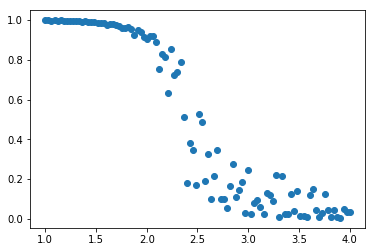

In [13]:
# Main Loop
start_time = timeit.default_timer() # Timer

mags = np.zeros(nTemp)              # Array of magnetization values
temp = np.linspace(1,4,nTemp)       # Array of temperature values

for n in range(nTemp):              # Scan over temperature steps
    m = 0
    T = temp[n]
    
    # Equilibrate
    for i in range(3*nStep):
        ii = randrange(0,nSide) 
        jj = randrange(0,nSide)
        mcmc(state,ii,jj,T)
    
    # mcmc
    for i in range(nStep):           # Number of mcmc steps to take
        ii = randrange(0,nSide)      # Generate random indices
        jj = randrange(0,nSide)
        
        mcmc(state,ii,jj,T)         
        mag = magnetization(state)   # Calculate magnetization
        m += mag
        mags[n] = m/(nStep*nSide**2) # Average magnetization per step/site

plt.plot(temp,abs(mags),'o')         # Plot magnetization as function of temperature

elapsed = timeit.default_timer() - start_time
print("Time: ")
print(elapsed)

## Problem 2: animate!

Copy your solution to Problem 1 below. In this problem, we'll output an animated PNG of the lattice.  
  
  
Define a function `postState(state)` that is based on `plotState`, but instead saves the figure to a subfolder, `HW8b/` with some frame number. 

```python
    plt.savefig("HW8b/frame" + str(frame_num))
    plt.clf() # clear the plot after
```
  
Now modify the scan over temperatures so that at each temperature, (1) run `postState(state)`, (2) increment `frame_num`.  Then follow Homework 8a to use the `APNG` package to stitch together the individual frames into a single animated PNG. Include that image below. 
  
  
Here's an example of how it should look:
<img src="HW8b_sample.png">

(Note that this example has a small mistake, can you tell what it is?)

*Is it the beginning of the animation, where it starts with a state that is segmented?*

In [34]:
# Main Loop
start_time = timeit.default_timer() # Timer

mags = np.zeros(nTemp)              # Array of magnetization values
temp = np.linspace(1,4,nTemp)       # Array of temperature values
frame_num = 0                       # Initialize frame number

postState(state)                    # Initialize plot

for n in range(nTemp):              # Scan over temperature steps
    m = 0
    T = temp[n]
    
    # Equilibrate
    for i in range(3*nStep):
        ii = randrange(0,nSide) 
        jj = randrange(0,nSide)
        mcmc(state,ii,jj,T)
    
    # mcmc
    for i in range(nStep):           # Number of mcmc steps to take
        ii = randrange(0,nSide)      # Generate random indices
        jj = randrange(0,nSide)
        
        mcmc(state,ii,jj,T)         
        mag = magnetization(state)   # Calculate magnetization
        m += mag
        mags[n] = m/(nStep*nSide**2) # Average magnetization per step/site
        
    postState(state)
    frame_num += 1
        
elapsed = timeit.default_timer() - start_time
print("Time: ")
print(elapsed)

filenames = []
for i in range(frame_num):
    filenames.append("HW8b/frame" + str(i) + ".png")

APNG.from_files(filenames, delay=100).save("HW8b.png")

Time: 
40.14916960799928


<img src="Hw8b.png">

## Extra credit

Plot the **magnetic susceptibility**, 
$$\frac{1}{T}\left(\langle M^2 \rangle - \langle M \rangle^2\right)$$ 
as a function of temperature